widget


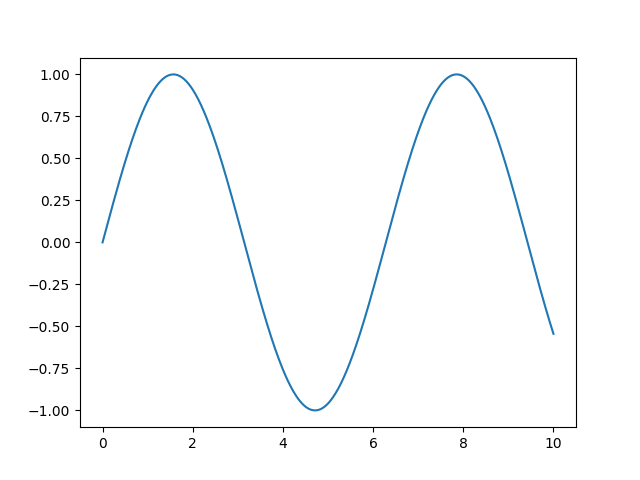

In [1]:
%matplotlib widget
import matplotlib, matplotlib.pyplot as plt
print(matplotlib.get_backend())  # 'module://ipympl.backend_nbagg' 나오면 OK

# 테스트
import numpy as np
x = np.linspace(0,10,500)
plt.plot(x, np.sin(x))


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

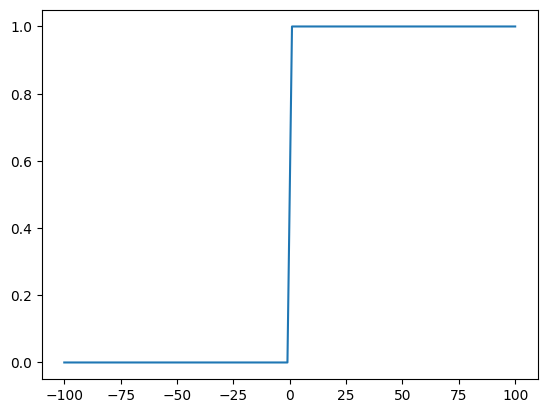

In [8]:
length = 2.74 / 2
width = 1.525
height = 0.76

In [7]:
def clamp(x, lo, hi):
    return lo if x < lo else hi if x > hi else x

def cloest_point_aabb(p, xmin, ymin, xmax, ymax):
    x, y = p
    return (clamp(x, xmin, xmax), clamp(y, ymin, ymax))

Text(0, 0.5, 'y')

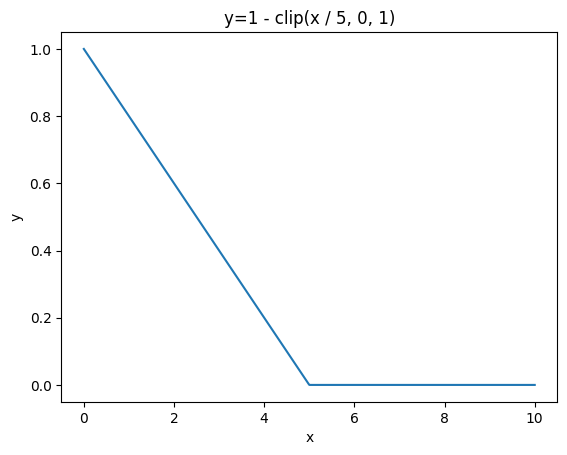

In [2]:
X = np.linspace(0, 10, 1000)
a = 5.0
Y = 1 - np.clip(X / a, 0, 1)
plt.title(fr"y=1 - clip(x / {a:.0f}, 0, 1)")
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

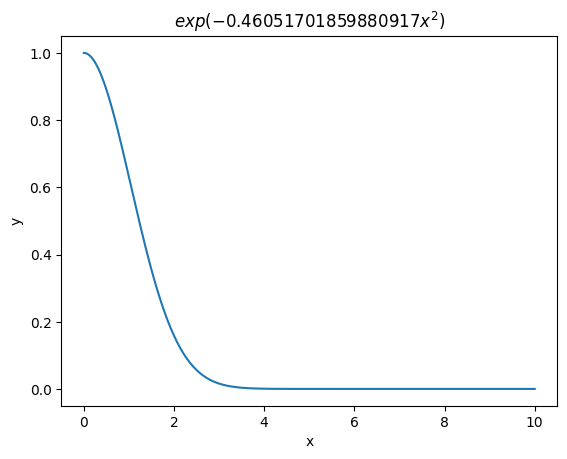

In [3]:
X = np.linspace(0, 10, 1000)
d = 5
a = np.log(0.00001) / -(d ** 2)
Y = np.exp(-a * X ** 2)
plt.title(fr"$exp(-{a}x^2)$")
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, '$\\Phi(s)$')

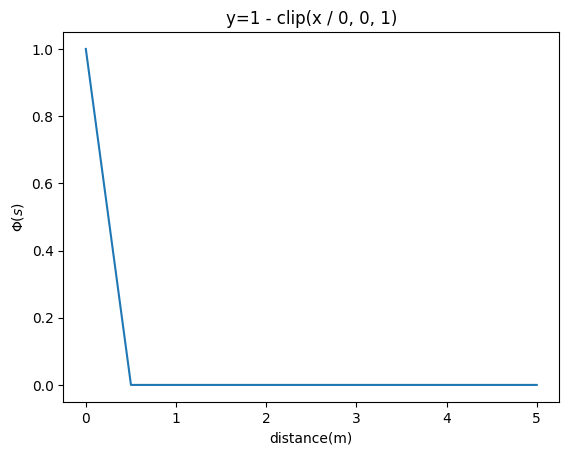

In [9]:
X = np.linspace(0, 5, 1000)
a = 0.5
Y = 1 - np.clip(X / a, 0, 1)
plt.title(fr"y=1 - clip(x / {a:.0f}, 0, 1)")
plt.plot(X, Y)
plt.xlabel("distance(m)")
plt.ylabel("$\Phi(s)$")

In [23]:
def closest_point_aabb_xy(X, Y, xmin, ymin, xmax, ymax):
    Qx = np.clip(X, xmin, xmax)
    Qy = np.clip(Y, ymin, ymax)
    return Qx, Qy

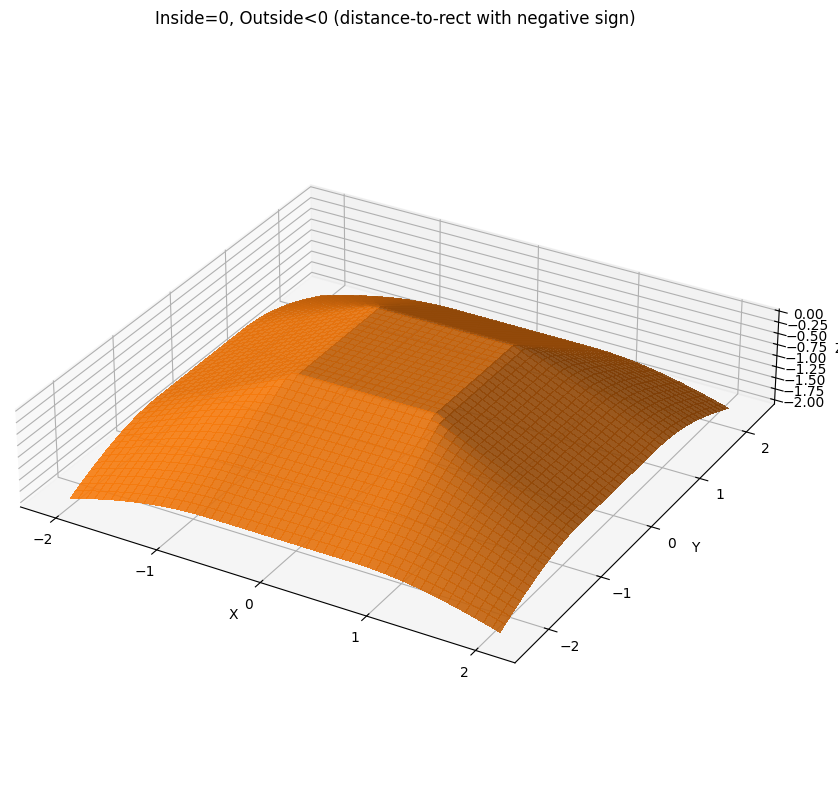

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 직사각형: (xmin, ymin) ~ (xmax, ymax)
length, width = 2.74 / 2, 1.525
xmin, xmax = -length/2, length/2
ymin, ymax = -width/2,  width/2

# 샘플 그리드
X = np.linspace(-length*1.5, length*1.5, 300)
Y = np.linspace(-width*1.5,  width*1.5, 300)
X, Y = np.meshgrid(X, Y)

# --- "영역까지의 거리": 내부 0, 외부>0 ---
dx = np.maximum(np.maximum(xmin - X, 0), X - xmax)
dy = np.maximum(np.maximum(ymin - Y, 0), Y - ymax)
D_out = np.hypot(dx, dy)  # 영역 밖일 때 바깥 거리, 안이면 0

# 원하는 사양: 내부=0, 외부=음수
Z = -D_out

# 시각화
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,0.2])

# 참고용: 직사각형 평면
RX, RY = np.meshgrid([xmin, xmax], [ymin, ymax])
RZ = np.zeros_like(RX)
ax.plot_surface(RX, RY, RZ, alpha=0.25)

# 표면으로 그리면 형태가 잘 보임
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.9)

ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Inside=0, Outside<0 (distance-to-rect with negative sign)")
plt.show()


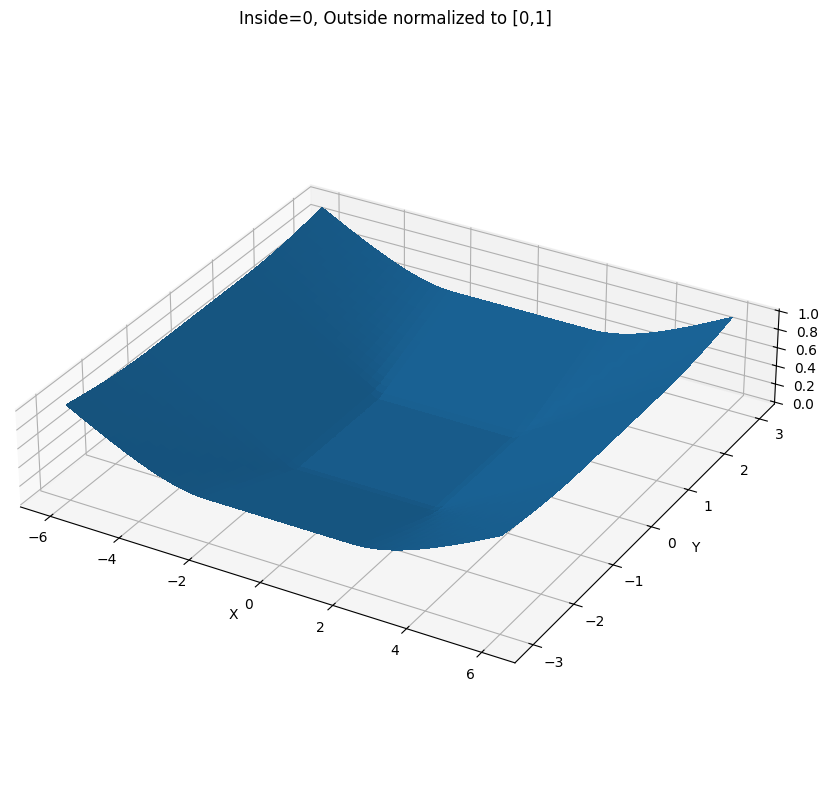

In [32]:
import numpy as np
import matplotlib.pyplot as plt

length, width = 4.0, 2.0
xmin, xmax = -length/2, length/2
ymin, ymax = -width/2,  width/2

X = np.linspace(-length*1.5, length*1.5, 300)
Y = np.linspace(-width*1.5,  width*1.5, 300)
X, Y = np.meshgrid(X, Y)

dx = np.maximum(np.maximum(xmin - X, 0), X - xmax)
dy = np.maximum(np.maximum(ymin - Y, 0), Y - ymax)
D = np.hypot(dx, dy)  # inside=0, outside>0

# 정규화 (0~1)
D_max = np.max(D)
Z = D / D_max

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,0.2])

ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Inside=0, Outside normalized to [0,1]")
plt.show()


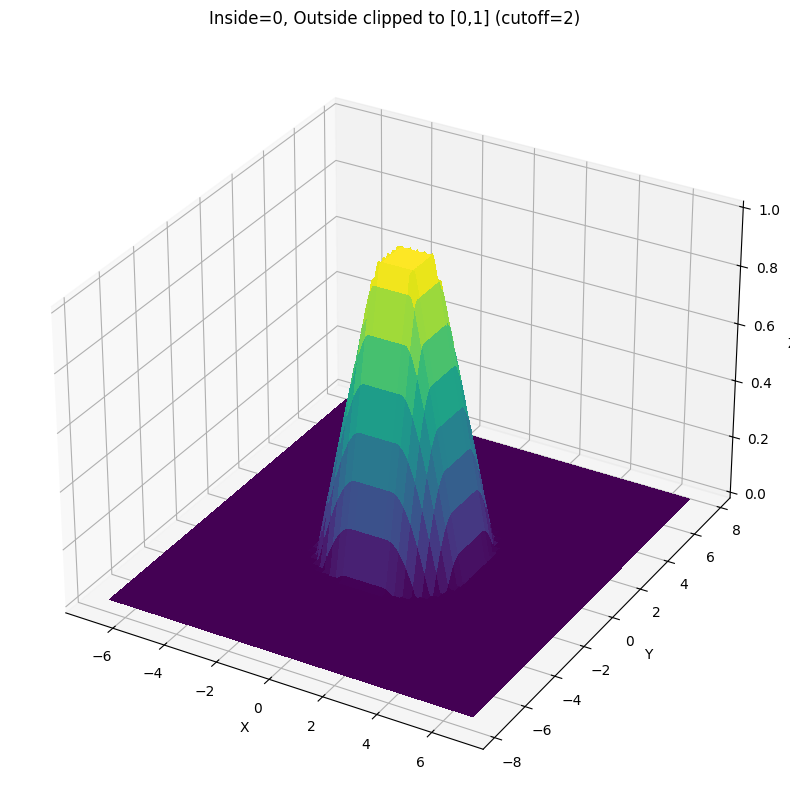

In [4]:
import numpy as np
import matplotlib.pyplot as plt

length, width = 2.74 / 2, 1.525
xmin, xmax = -length/2, length/2
ymin, ymax = -width/2,  width/2

X = np.linspace(-length*5, length*5, 300)
Y = np.linspace(-width*5,  width*5, 300)
X, Y = np.meshgrid(X, Y)

# 바깥 거리 계산
dx = np.maximum(np.maximum(xmin - X, 0), X - xmax)
dy = np.maximum(np.maximum(ymin - Y, 0), Y - ymax)
D = np.hypot(dx, dy)

# clip 형식: cutoff 거리 지정
cutoff = 2
Z = 1 - np.clip(D / cutoff, 0, 1)   # 0~cutoff까지는 선형, 그 이상은 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([length,width,1])

ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=False)
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Inside=0, Outside clipped to [0,1] (cutoff={})".format(cutoff))
plt.show()
